# Regressão

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load datasets
states = pd.read_csv('../databases/states.zip')

In [3]:
X = states['guns_registered'].values.reshape(-1,1)
y = states['n_incidents'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coefficient: {lin_regr.coef_[0][0]}')
print(f'Intercept: {lin_regr.intercept_[0]}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print('R2: %.2f' % r2_score(y_test, y_pred))

Coefficient: 8.197483706770807
Intercept: 864.4644028588483
Mean squared error: 508611.06
R2: 0.64


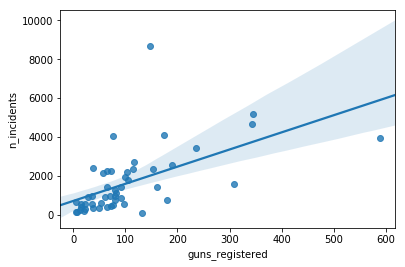

In [4]:
sns.regplot(x='guns_registered', y='n_incidents', data=states)